In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as py

In [ ]:
from google.colab import files
files.upload()

Saving AirQuality.xlsx to AirQuality.xlsx


{'AirQuality.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00{\x92\xc8!z\x01\x00\x00\x81\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
df=pd.read_excel('AirQuality.xlsx')

In [ ]:
df.dtypes

CO(GT)          float64
PT08.S1(CO)     float64
PT08.S3(NOx)    float64
NO2(GT)           int64
PT08.S4(NO2)    float64
PT08.S5(O3)     float64
T               float64
RH              float64
AH              float64
dtype: object

In [ ]:
df.isna().sum()

CO(GT)          0
PT08.S1(CO)     0
PT08.S3(NOx)    0
NO2(GT)         0
PT08.S4(NO2)    0
PT08.S5(O3)     0
T               0
RH              0
AH              0
dtype: int64

In [ ]:
y=df['AH']
x=df.iloc[:,0:7]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [ ]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (1301, 7)
Shape of x_test:  (230, 7)
Shape of y_train:  (230,)
Shape of y_test:  (230,)


In [ ]:
from sklearn.linear_model import LinearRegression
model_regresi = LinearRegression()
model_regresi.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(pd.DataFrame({'Predictor' : x.columns, 'coefficient' : model_regresi.coef_}))

      Predictor  coefficient
0        CO(GT)     0.001258
1   PT08.S1(CO)    -0.002380
2  PT08.S3(NOx)     0.017509
3       NO2(GT)    -0.002128
4  PT08.S4(NO2)     0.009074
5   PT08.S5(O3)     0.003683
6             T     0.738995


In [ ]:
y_pred_train=model_regresi.predict(x_train)
hasil_train = pd.DataFrame({'Predicted_AH' : y_pred_train, 'Actual_AH' : y_train, 'Residual' : y_train - y_pred_train})
print(hasil_train.head(20))

      Predicted_AH   Actual_AH  Residual
371      -3.772396    0.765534  4.537930
1422     -1.509920    0.940484  2.450404
1212     -0.000663    1.313642  1.314305
1084     -1.286531    1.177351  2.463882
192       6.169821    0.744593 -5.425228
1110     -0.606349    0.720620  1.326969
1097      2.686558    0.678933 -2.007625
926       1.085674    1.194992  0.109318
63       -3.890253    0.712367  4.602620
707    -196.770563 -200.000000 -3.229437
1146      6.851072    0.778467 -6.072604
1203      1.309688    1.217289 -0.092399
939      -0.231869    1.074415  1.306285
908       3.690740    1.029781 -2.660959
274      10.369292    1.015304 -9.353988
1376      0.446803    1.079412  0.632609
668      -1.846659    0.843334  2.689994
1378      1.577380    1.078724 -0.498656
198      -3.176991    0.973519  4.150510
453       0.831091    0.538658 -0.292433


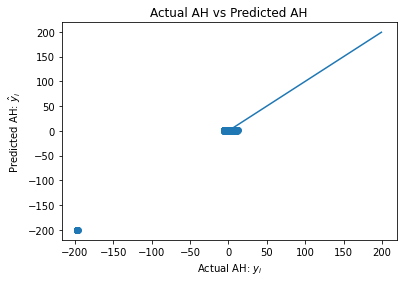

In [ ]:
plt.scatter(y_pred_train, y_train)
plt.plot(range(200), range(200))

plt.xlabel("Actual AH: $y_i$")
plt.ylabel("Predicted AH: $\hat{y}_i$")
plt.title("Actual AH vs Predicted AH")

plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred_train = model_regresi.predict(x_train)
r2_score_train = r2_score(y_train, y_pred_train)

y_pred_test = model_regresi.predict(x_test)
r2_score_test = r2_score(y_test, y_pred_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
cross_val = cross_val_score(estimator = model_regresi, X = x, y = y, cv =folds)

In [ ]:
print('R2_score (train): ', r2_score_train)
print('R2_score (test): ', r2_score_test)
print("RMSE (train): ", rmse_train)
print("RMSE (test): ", rmse_test)
print("CV: ", cross_val.mean())

R2_score (train):  0.9838025278727301
R2_score (test):  0.9863917982525816
RMSE (train):  3.2968176274574272
RMSE (test):  3.4178526910134406
CV:  -24.64222357884367


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


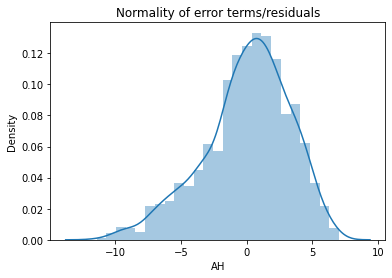

In [ ]:
p = sns.distplot(y_train - y_pred_train, kde = True)
p = plt.title('Normality of error terms/residuals')

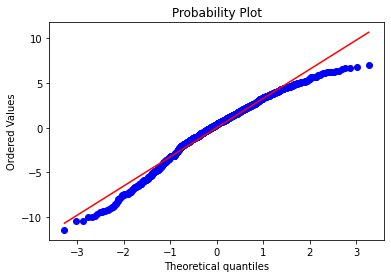

In [ ]:
stats.probplot(y_train - y_pred_train, dist = "norm", plot=py)
py.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


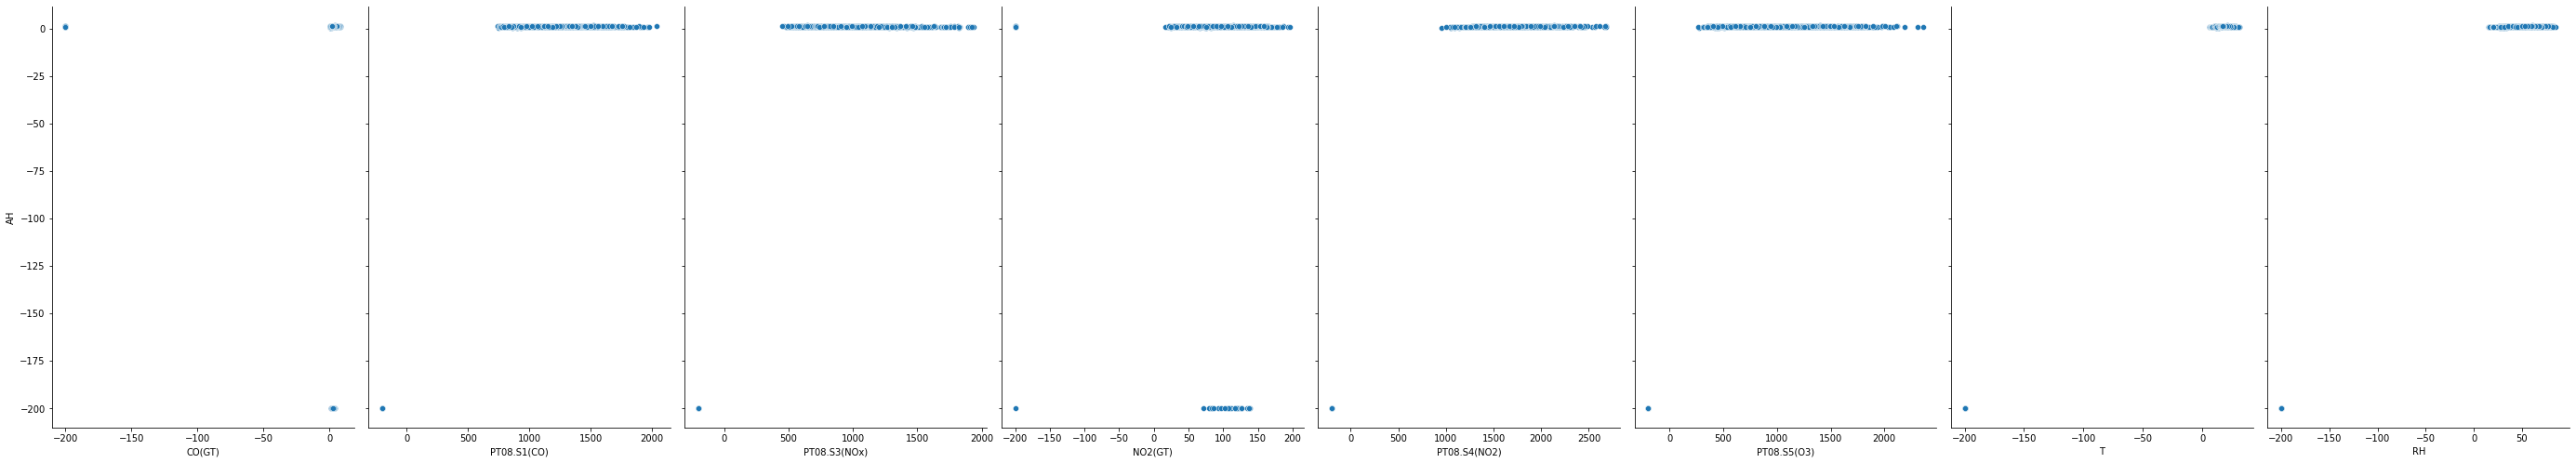

In [ ]:
p = sns.pairplot(df, x_vars=['CO(GT)','PT08.S1(CO)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH'], y_vars='AH' , size=7, aspect=0.7)

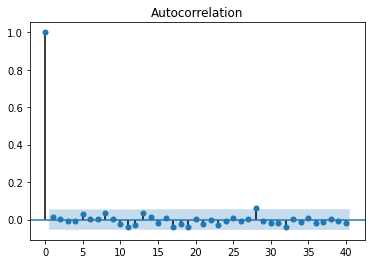

In [ ]:
sm.graphics.tsa.plot_acf(y_train - y_pred_train , lags=40)
plt.show()

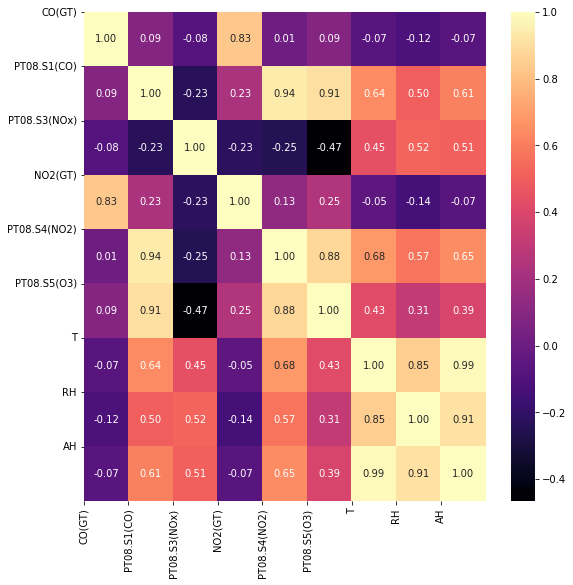

In [ ]:
korelasi=df.corr()
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(korelasi, cmap='magma' , annot=True, fmt=".2f")
plt.xticks(range(len(korelasi.columns)), korelasi.columns)
plt.yticks(range(len(korelasi.columns)), korelasi.columns)
plt.show()

In [ ]:
x_const_train=sm.add_constant(x_train)
modelsm= sm.OLS(y_train, x_const_train).fit()
modelsm.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AH   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.122e+04
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:41:49   Log-Likelihood:                -3398.1
No. Observations:                1301   AIC:                             6812.
Df Residuals:                    1293   BIC:                             6854.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -43.2166      1.430    -30.219      0.000     -46.022     -40.411
CO(GT)           0.0013      0.002      0.612      0.540      -0.003       0.005
PT08.S1(CO)     -0.0024      0.001     -2.011      0.044      -0.005   -5.87e-05
PT08.S3(NOx)     0.0175      0.001     26.591      0.000       0.016       0.019
NO2(GT)         -0.0021      0.001     -1.529      0.127      -0.005       0.001
PT08.S4(NO2)     0.0091      0.001      9.682      0.000       0.007       0.011
PT08.S5(O3)      0.0037      0.001      5.133      0.000       0.002       0.005
T                0.7390      0.009     85.226      0.000       0.722       0.756
==============================================================================
Omnibus:                       67.682   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.239
Skew:                          -0.592   Prob(JB):                     1.69e-17
Kurtosis:                       3.145   Cond. No.                     3.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""